In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

Partiendo de la ecuacion:  
z = $x^3+x^2+y^3+y^2$  
z = $\theta_0^3+\theta_0^2+\theta_1^3+\theta_1^2$



Obtenemos la derivada parcial de X y de Y con lo cual obtenemos:  

$3x^2 + 2x$  
$3y^2 + 2y$


In [2]:
def func(x, y):
    return x**3 + x**2 + y**3 + y**2

def dparc_x (x, y):
    return 3*x**2 + 2*x
    
def dparc_y(x, y):
    return 3*y**2 + 2*y

In [3]:
#def graph_3d(xs, ys, zs, hor, vert):
def graph_3d(xs, ys, zs):
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-1, 1, 100)
    Y = np.linspace(-1, 1, 100)
    X,Y = np.meshgrid(X, Y)
    Z = X**3 + X**2 + Y**3 + Y**2
    ax.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, antialiased=True, alpha=0.5)
    ax.scatter(xs, ys, zs, color='r', s=5)  
    #ax.view_init(elev=vert, azim=hor, roll=0)          # View angle
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z = x^3 + x^2 + y^3 + y^2')
    ax.set_title('Superficie 3D')
    plt.show()

In [4]:
#def grad (theta1, theta2, alfa, epochs, hor, vert):
def grad (theta1, theta2, alfa, epochs):
    xs = []
    ys = []
    zs = []
    for i in range(epochs):
        theta1 = theta1-alfa*dparc_x(theta1,theta2)
        theta2 = theta2-alfa*dparc_y(theta1,theta2)

        xs.append(theta1)
        ys.append(theta2)
        zs.append(func(theta1, theta2))

    #graph_3d(xs, ys, zs, hor, vert)
    graph_3d(xs, ys, zs)
    return theta1, theta2

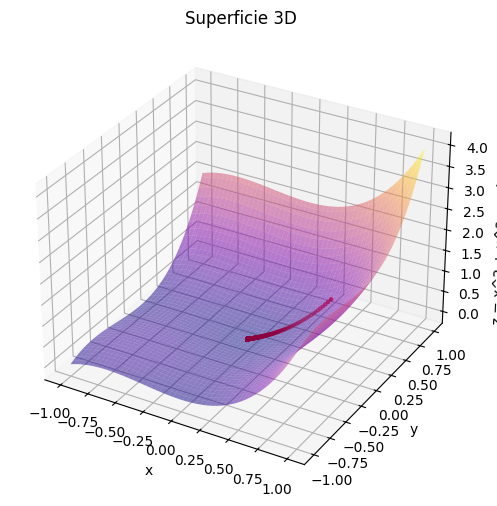

(3.813579763720796e-45, 3.813579763720796e-45)

In [5]:
#grad(0.5, 0.5, 0.01, 5000, 45, 30)
grad(0.5, 0.5, 0.01, 5000)


# Gradiente Automatica

In [ ]:
def grad_linreg_stable(X, y, alpha=0.05, epochs=2000, theta0=0.0, theta1=0.0, return_history=False):
    X = np.asarray(X, dtype=float).ravel()
    y = np.asarray(y, dtype=float).ravel()
    m = X.size

    # 1) Escalado (estandarización)
    mux, sx = X.mean(), X.std(ddof=0)
    muy, sy = y.mean(), y.std(ddof=0)

    Xs = (X - mux) / sx
    ys = (y - muy) / sy

    t0, t1 = 0.0, 0.0  # Espacio escalado (ignora args iniciales)
    hist = {"t0":[], "t1":[], "J":[]}

    for _ in range(epochs):
        yhat_s = t1*Xs + t0
        res = yhat_s - ys

        # 2) Gradientes en espacio escalado
        g0 = np.mean(res)
        g1 = np.mean(res * Xs)

        # 3) Gradient clipping para estabilidad
        g0 = np.clip(g0, -1e3, 1e3)
        g1 = np.clip(g1, -1e3, 1e3)

        # 4) Actualización
        t0 -= alpha * g0
        t1 -= alpha * g1

        if return_history:
            J = 0.5*np.mean(res**2)
            hist["t0"].append(t0); hist["t1"].append(t1); hist["J"].append(J)

    # 5) Volver a la escala original
    # y_s = t1*x_s + t0  -> y = sy*y_s + muy; x_s=(x-mux)/sx
    theta1_orig = (sy/sx) * t1
    theta0_orig = muy + sy*t0 - theta1_orig * mux

    if return_history:
        return theta0_orig, theta1_orig, hist
    return theta0_orig, theta1_orig


In [11]:
df = pd.read_csv('DB/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
theta0, theta1, hist = grad_linreg_stable(df["TV"].values, df["Sales"].values,
                                          alpha=0.05, epochs=5000, return_history=True)
print("θ0 =", theta0, "  θ1 =", theta1)


θ0 = 7.032593549127703   θ1 = 0.04753664043301968


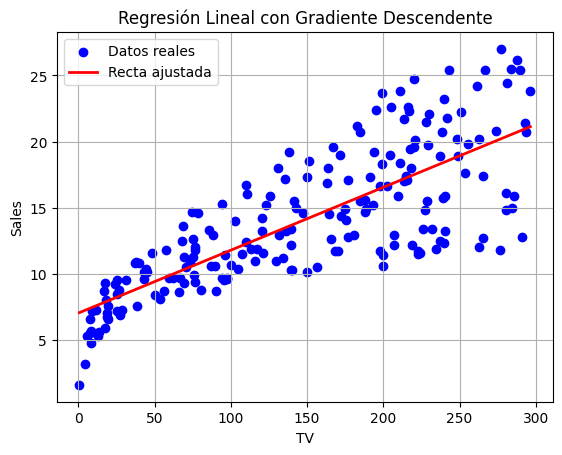

In [ ]:
plt.scatter(df["TV"], df["Sales"], color="blue", label="Datos reales")


x_line = np.linspace(df["TV"].min(), df["TV"].max(), 100)
y_line = theta1 * x_line + theta0
plt.plot(x_line, y_line, color="red", linewidth=2, label="Recta ajustada")

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Regresión Lineal con Gradiente Descendente")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
y_pred = theta1 * df["TV"].values + theta0

# Cálculo del Error Medio Cuadrático
EMC = np.mean((df["Sales"].values - y_pred)**2)
print("Error Medio Cuadrático (EMC):", EMC)

Error Medio Cuadrático (EMC): 10.512652915656757


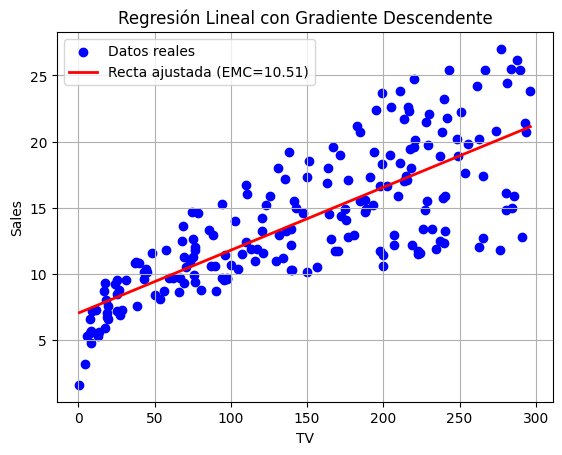

In [18]:
plt.scatter(df["TV"], df["Sales"], color="blue", label="Datos reales")

plt.plot(x_line, y_line, color="red", linewidth=2,
         label=f"Recta ajustada (EMC={EMC:.2f})")

plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Regresión Lineal con Gradiente Descendente")
plt.legend()
plt.grid(True)
plt.show()
